# Agoda Case

In [4]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Confirm working directory is same as folder location where files are saved
#pwd

# Ingest Data

In [6]:
# Read in given Datasets
cityA = pd.read_excel('Case_Study_Urgency_Message_Data.xlsx',sheet_name='City_A')
cityB = pd.read_excel('Case_Study_Urgency_Message_Data.xlsx',sheet_name='City_B')
cityC = pd.read_excel('Case_Study_Urgency_Message_Data.xlsx',sheet_name='City_C')
cityD = pd.read_excel('Case_Study_Urgency_Message_Data.xlsx',sheet_name='City_D')
cityE = pd.read_excel('Case_Study_Urgency_Message_Data.xlsx',sheet_name='City_E')

In [237]:
# Create Merged Dataset (All Cities)
datasets = [cityA,cityB,cityC,cityD,cityE]
all_cities = pd.concat(datasets,ignore_index=True)
datasets.append(all_cities)

## Clean Data

In [238]:
#Check for errors and data completeness
def check_data_completeness(df):
    a = "Null values: {}".format(sum(df.isnull().sum()))
    b = "NA values: {}".format(sum(df.isna().sum()))                                 
    c= "Lenght of dataframe: Rows {}, Columns {}".format(len(df),len(df.columns))
    return a,b,c

In [239]:
for df in datasets:
        print(check_data_completeness(df))

('Null values: 0', 'NA values: 0', 'Lenght of dataframe: Rows 22365, Columns 13')
('Null values: 0', 'NA values: 0', 'Lenght of dataframe: Rows 4932, Columns 13')
('Null values: 0', 'NA values: 0', 'Lenght of dataframe: Rows 6797, Columns 13')
('Null values: 0', 'NA values: 0', 'Lenght of dataframe: Rows 10152, Columns 13')
('Null values: 0', 'NA values: 0', 'Lenght of dataframe: Rows 4815, Columns 13')
('Null values: 0', 'NA values: 0', 'Lenght of dataframe: Rows 49061, Columns 13')


In [240]:
all_cities['hotel_id'].nunique()

880

# Create Extra Data

## New Columns in Dataset
- 'days_before_checkin' = Days before customer checked in to accomodation
- 'days_booked'         = No of Days customer stayed in accomodation
- 'total_revenue'       = Total Revenue per Booking

## New Dataset Table
- 'bookings'            = Cumulative Sum of Bookings
- 'percentage'          = Cumulative Percentage of Bookings

In [241]:
def create_extra_data(df):
    df['days_before_checkin'] = (df['checkin_date'] - df['booking_date']).dt.days
    df['days_booked'] = (df['checkout_date'] - df['checkin_date']).dt.days
    df['total_revenue'] = df['ADR_USD']*df['days_booked']
    df.drop(df[df['days_before_checkin']<0].index, inplace = True)
    
    return df


def calc_cum_bookings(df):
    # Group Dataframe by number of days before customer checkin date
    df_cum_bookings = df.groupby('days_before_checkin').count().reset_index()
    # Subselect Segement of Dataframe
    df_cum_bookings = df_cum_bookings[['days_before_checkin','ADR_USD']]
    # Rename Column Headers
    df_cum_bookings.columns = ['days_before_checkin', 'bookings']
    #Calculate Cumulative Bookings
    df_cum_bookings['percentage']=(100*df_cum_bookings['bookings']/df_cum_bookings['bookings'].sum())[::-1].cumsum()
    df = df_cum_bookings
    return df

# Other Updates to possibly add to Code
# - Return no of rows removed/percentage of rows removed

In [242]:
# Format Datasets
for df in datasets:
        create_extra_data(df)

In [243]:
# Check Data Integrity
for df in datasets:
        print(check_data_completeness(df))

('Null values: 0', 'NA values: 0', 'Lenght of dataframe: Rows 22365, Columns 13')
('Null values: 0', 'NA values: 0', 'Lenght of dataframe: Rows 4932, Columns 13')
('Null values: 0', 'NA values: 0', 'Lenght of dataframe: Rows 6797, Columns 13')
('Null values: 0', 'NA values: 0', 'Lenght of dataframe: Rows 10152, Columns 13')
('Null values: 0', 'NA values: 0', 'Lenght of dataframe: Rows 4815, Columns 13')
('Null values: 0', 'NA values: 0', 'Lenght of dataframe: Rows 49061, Columns 13')


In [246]:
all_cities['total_revenue'].sum()

12552312.923595235

In [837]:
#sum(cityA[cityA['days_before_checkin']<0].sum())

In [244]:
# Create new Datasets with cumulative booking data
cityA_cum = calc_cum_bookings(cityA)
cityB_cum = calc_cum_bookings(cityB)
cityC_cum = calc_cum_bookings(cityC)
cityD_cum = calc_cum_bookings(cityD)
cityE_cum = calc_cum_bookings(cityE)
all_cities_cum = calc_cum_bookings(all_cities)


In [245]:
datasets_cum = [cityA_cum,cityB_cum,cityC_cum,cityD_cum,cityE_cum,all_cities_cum]

# 

# Exploratory Data Analysis

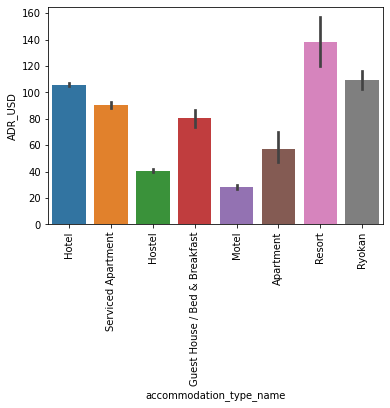

In [17]:
#plt.figure(dpi=200,figsize=(12,4))
sns.barplot(data=cityA,x='accommodation_type_name',y='ADR_USD')

plt.xticks(rotation=90)
plt.show;

## City Statistics

Median Days Booked

In [925]:
all_cities['days_before_checkin'].median()

8.0

In [926]:
# Average ADR
all_cities['ADR_USD'].mean()

148.0930176823937

In [1049]:
all_cities['total_revenue'].sum()

12552312.923595235

## Visualisations

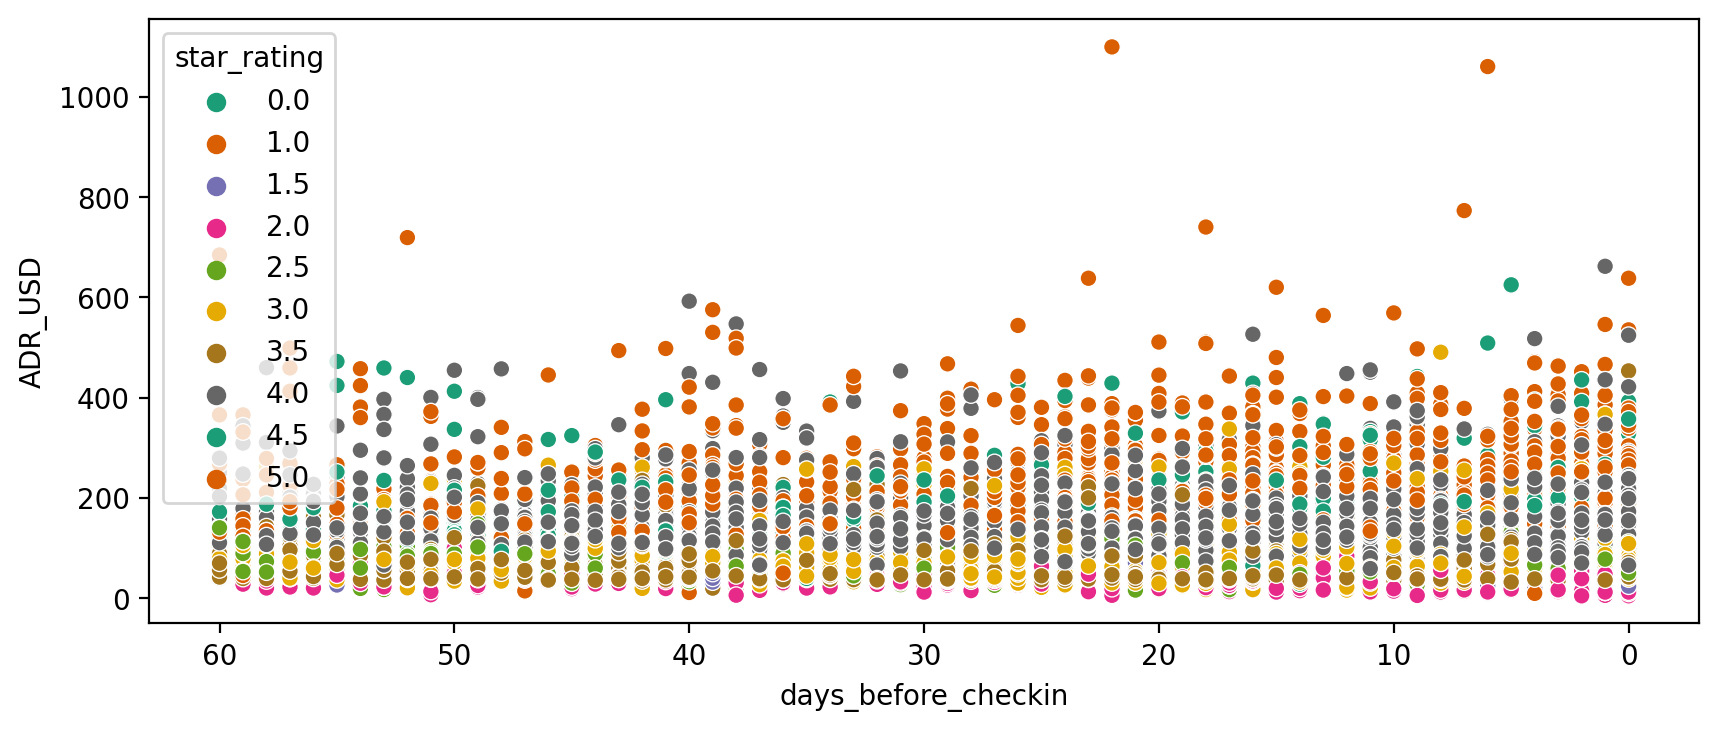

In [255]:
plt.figure(dpi=200,figsize=(10,4))

sns.scatterplot(data=cityA,y=cityA['ADR_USD'],x=(cityA['days_before_checkin']),hue='star_rating',palette = 'Dark2')

plt.gca().invert_xaxis()
plt.show();

<AxesSubplot:xlabel='days_before_checkin', ylabel='ADR_USD'>

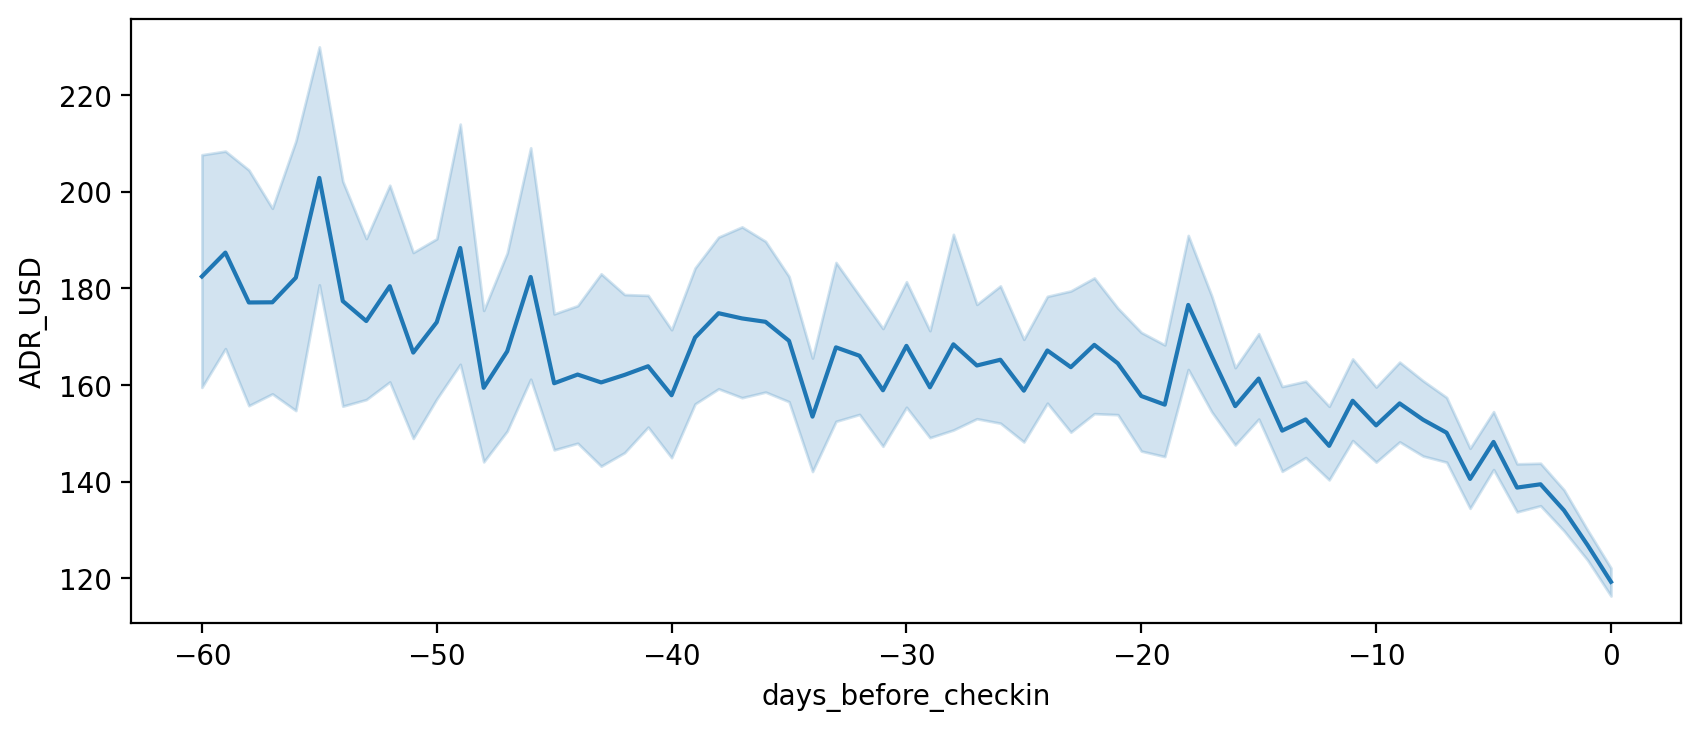

In [216]:
plt.figure(dpi=200,figsize=(10,4))

#sns.lineplot(data=cityA,x=cityA['days_before_checkin']*(-1),y='ADR_USD')
#sns.lineplot(data=cityB,x=cityB['days_before_checkin']*(-1),y='ADR_USD')
#sns.lineplot(data=cityC,x=cityC['days_before_checkin']*(-1),y='ADR_USD')
#sns.lineplot(data=cityD,x=cityD['days_before_checkin']*(-1),y='ADR_USD')
#sns.lineplot(data=cityE,x=cityE['days_before_checkin']*(-1),y='ADR_USD')
sns.lineplot(data=all_cities,x=all_cities['days_before_checkin']*(-1),y='ADR_USD')

#plt.labels()

In [1012]:
# Group by to calculate mean, same result as lineplot
#xx = all_cities.groupby('days_before_checkin').mean()[::-1][['ADR_USD']]
#xx[:3]

In [1013]:
#plt.figure(figsize=(4,2))
#sns.lineplot(data=xx,x=xx.index*(-1),y='ADR_USD')

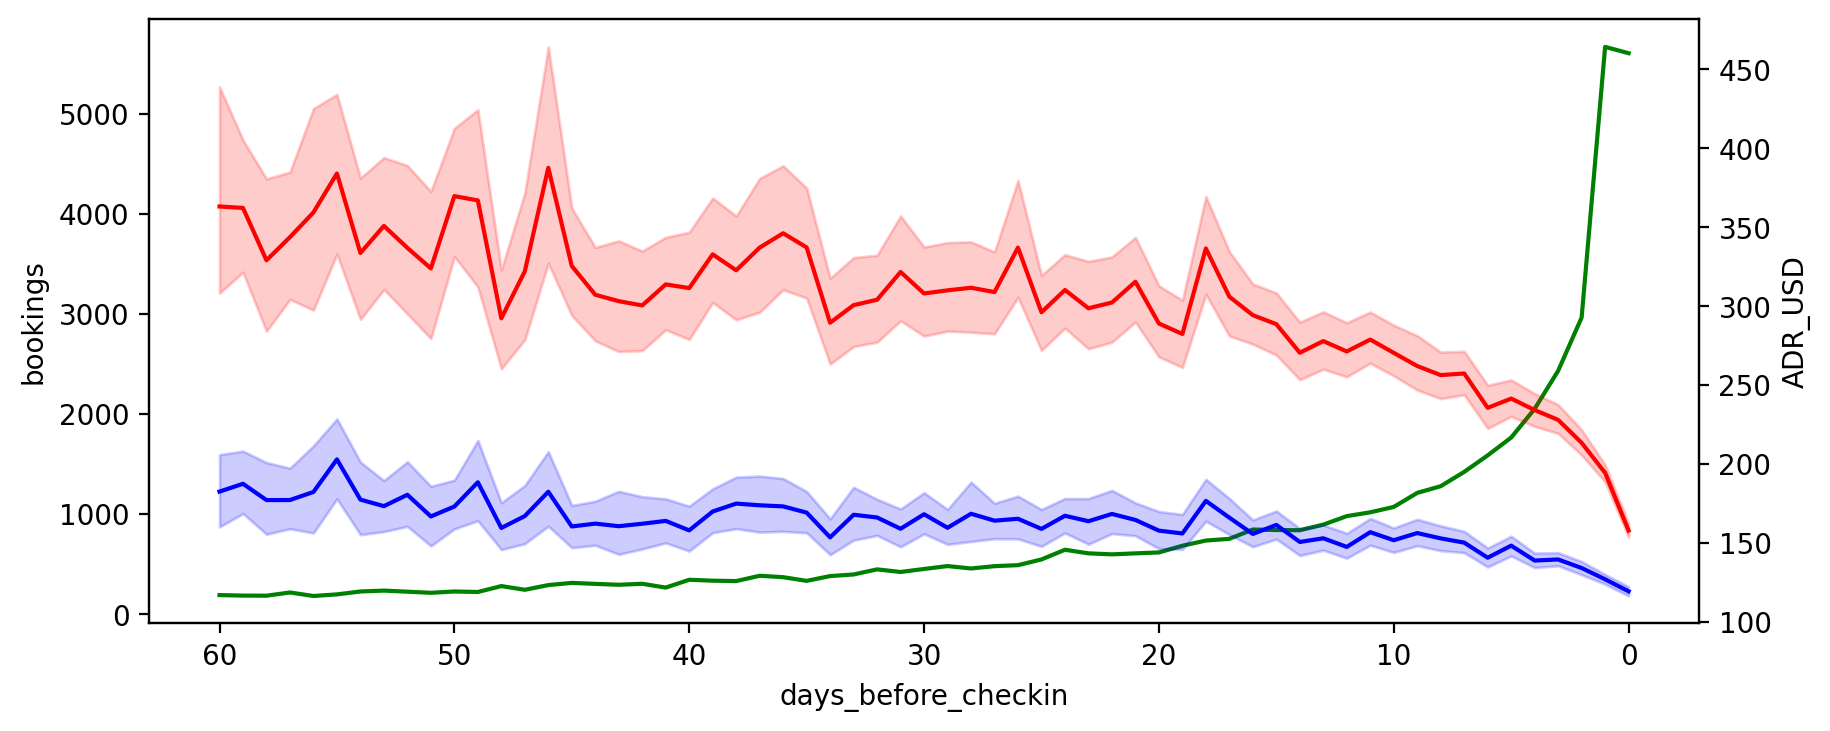

In [224]:
#plt.figure(dpi=200,figsize=(12,4))
fig, ax = plt.subplots(dpi=200,figsize=(10,4))
ax2 = ax.twinx()

#ax.tick_params(axis='y', labelcolor='red')
ax2.tick_params(axis='y', labelcolor='black')


sns.lineplot(data = all_cities_cum, x= all_cities_cum['days_before_checkin'],y='bookings',ax=ax,color='green')
#sns.lineplot(data = cityD_cum, x= cityD_cum['days_before_checkin'],y='percentage',ax=ax2,color='red')
sns.lineplot(data=all_cities,x=all_cities['days_before_checkin'],y='ADR_USD',ax=ax2,color='blue')
sns.lineplot(data=all_cities,x=all_cities['days_before_checkin'],y='total_revenue',ax=ax2,color='red')


plt.gca().invert_xaxis()
plt.show();

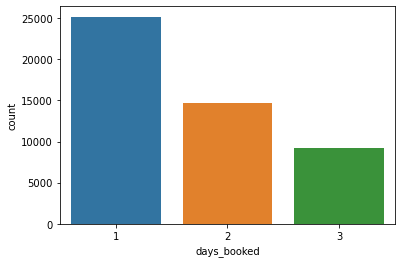

In [1007]:
#plt.figure(dpi=200,figsize=(12,4))
sns.countplot(data=all_cities,x='days_booked')
#plt.xticks(rotation=90)
plt.show;

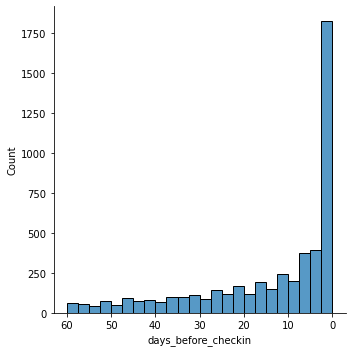

In [1019]:
sns.displot(data=cityB,x='days_before_checkin')
plt.gca().invert_xaxis()

In [ ]:
#DO NOT USE DISTPLOT -deprecated

sns.set(style='darkgrid') #whitegrid, white,dark,tick - high level cmd, set for whole notebook
sns.displot(data=df,x='salary',bins=10,color='red',edgecolor='blue'
           ,lw=1.5,ls='--')

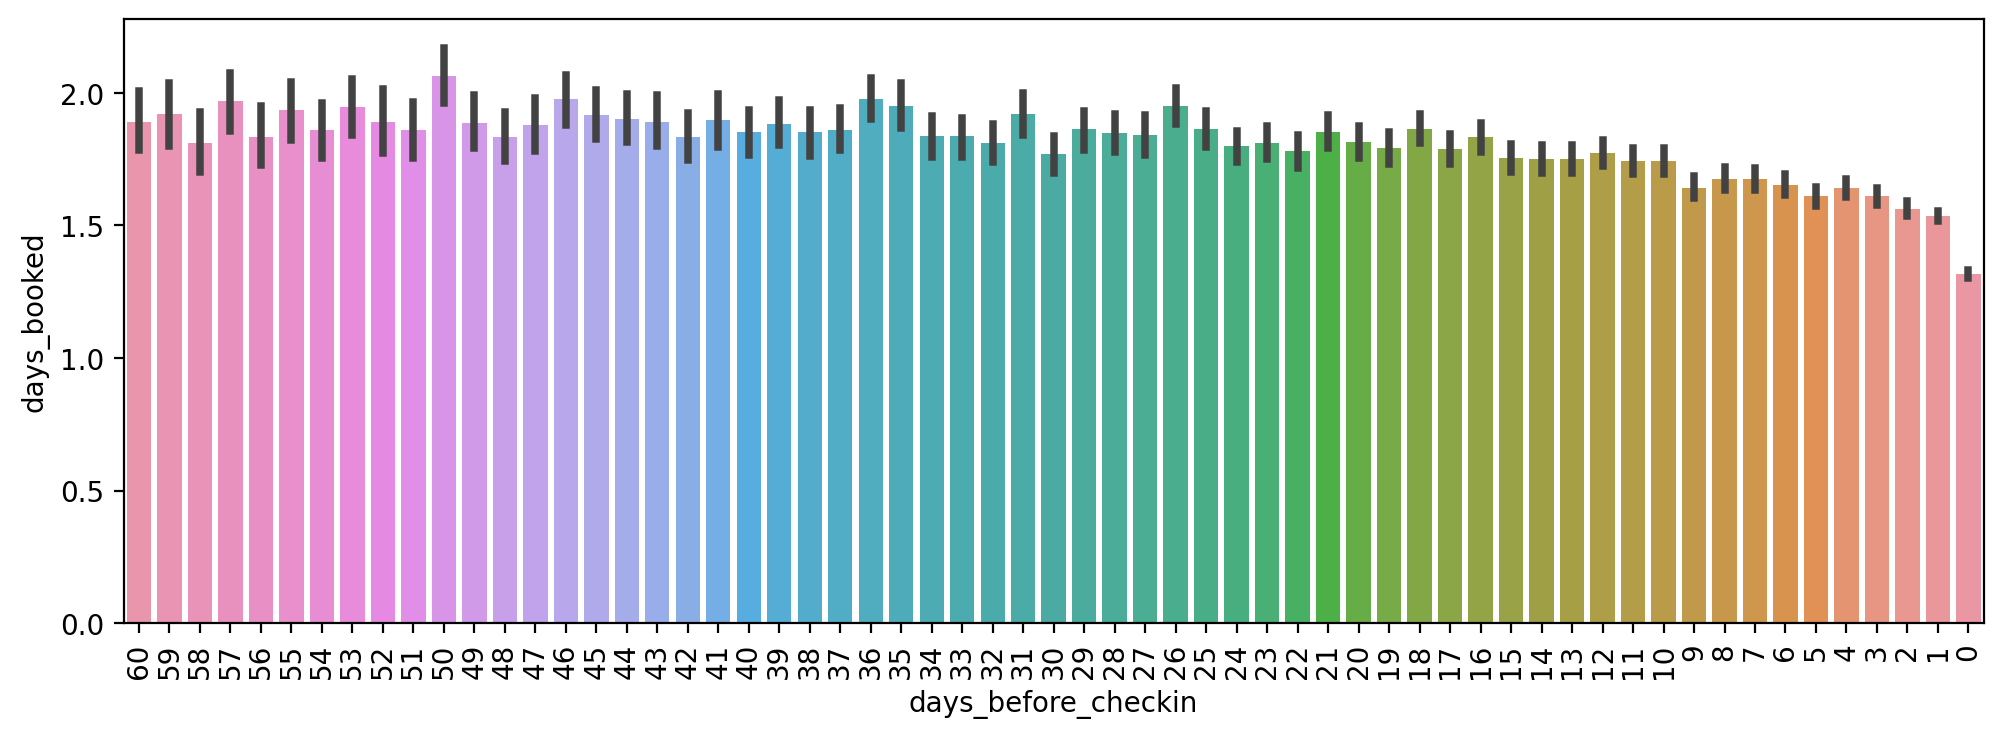

In [249]:
plt.figure(dpi=200,figsize=(12,4))
sns.barplot(y='days_booked',x='days_before_checkin',data=all_cities)
plt.xticks(rotation=90)

plt.gca().invert_xaxis()
plt.show();

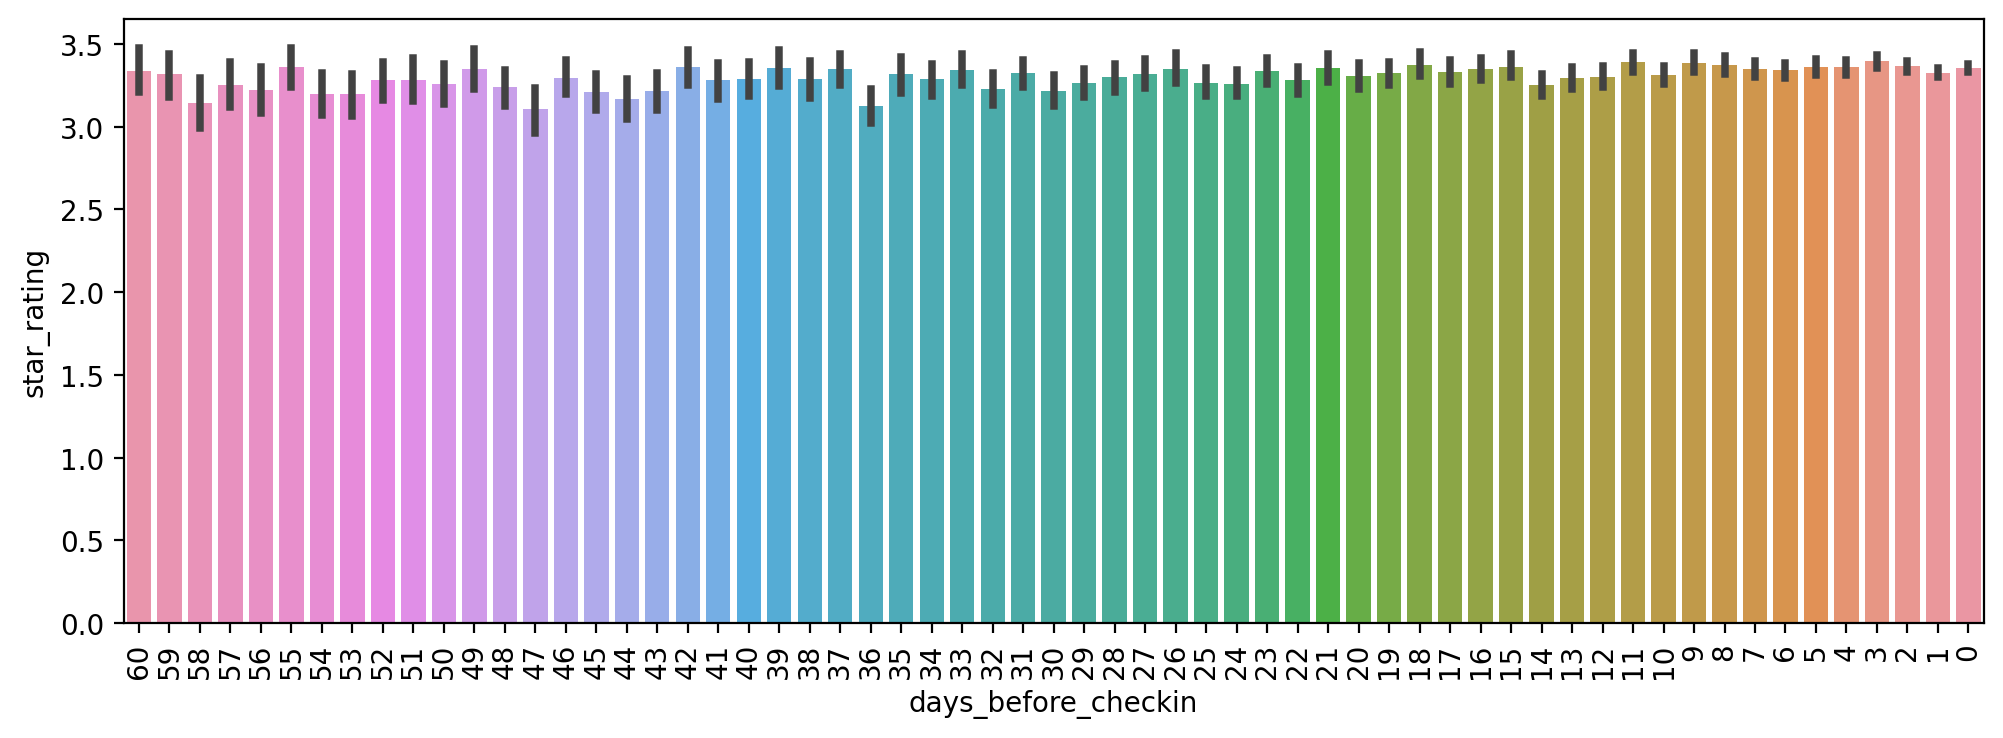

In [1037]:
plt.figure(dpi=200,figsize=(12,4))
sns.barplot(y='star_rating',x='days_before_checkin',data=all_cities)
plt.xticks(rotation=90)

plt.gca().invert_xaxis()
plt.show();

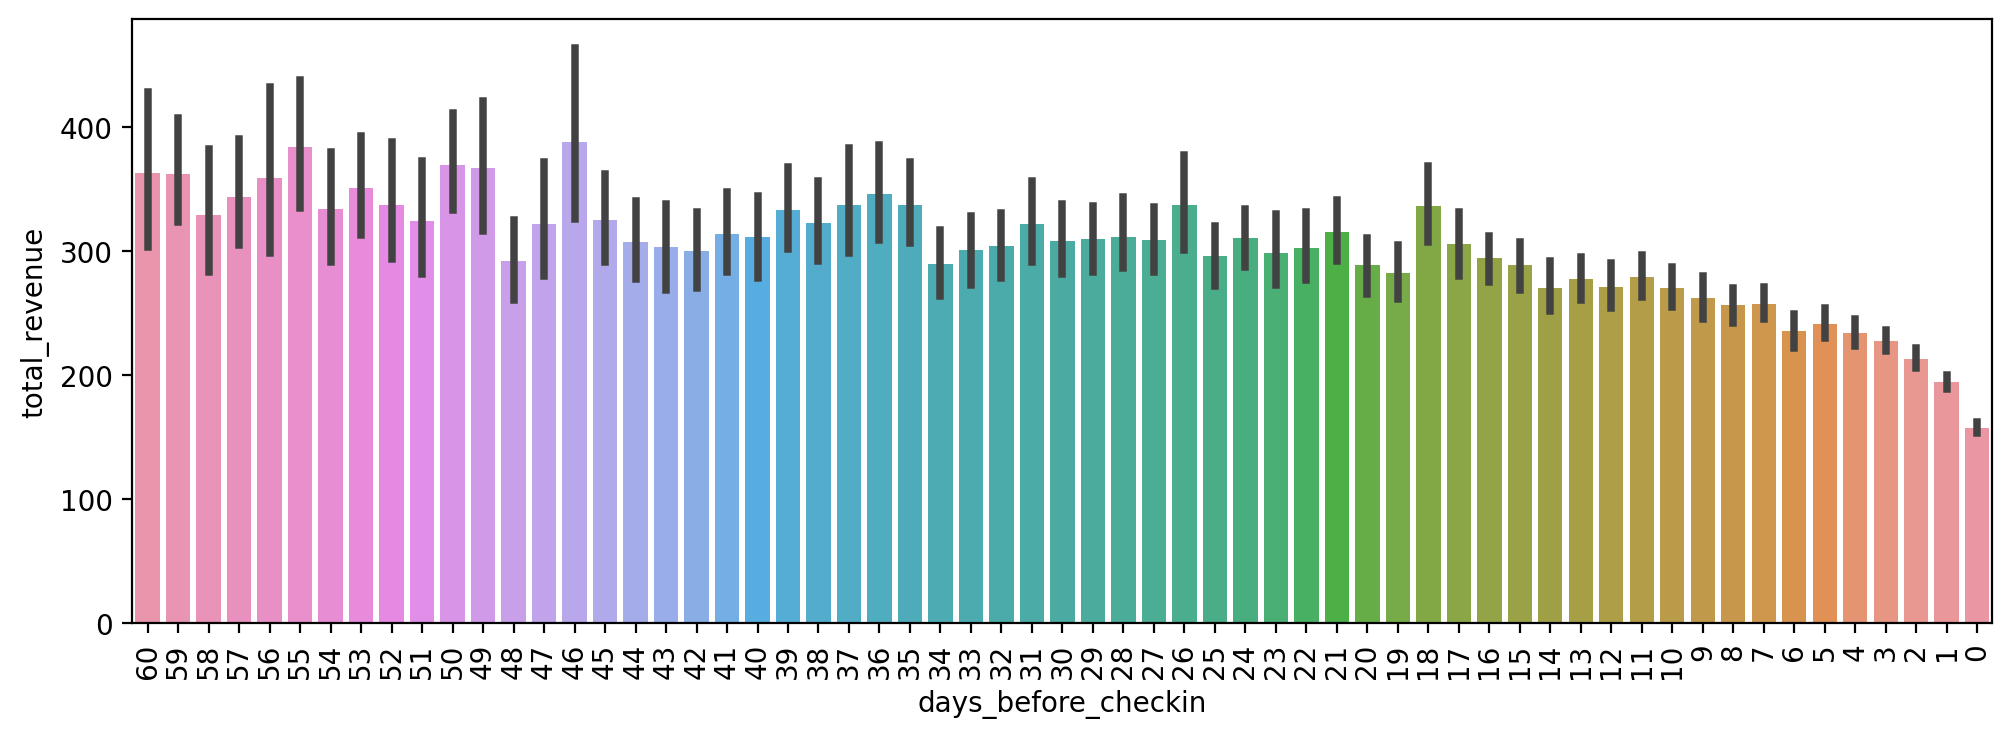

In [1044]:
plt.figure(dpi=200,figsize=(12,4))
sns.barplot(y='total_revenue',x='days_before_checkin',data=all_cities)
plt.xticks(rotation=90)

plt.gca().invert_xaxis()
plt.show();

<AxesSubplot:xlabel='ADR_USD', ylabel='days_before_checkin'>

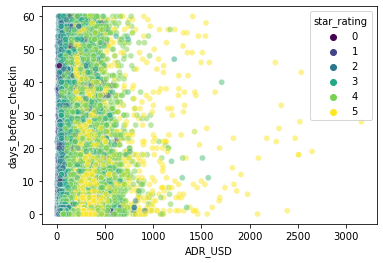

In [1058]:
#plt.figure(dpi=200,figsize=(12,4))
sns.scatterplot(x='ADR_USD',y='days_before_checkin',data=all_cities,hue='star_rating',
                palette = 'viridis',alpha=0.5)

<AxesSubplot:xlabel='ADR_USD', ylabel='days_before_checkin'>

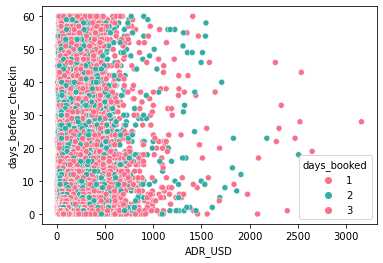

In [1059]:
#plt.figure(dpi=200,figsize=(12,4))
sns.scatterplot(x='ADR_USD',y='days_before_checkin',data=all_cities,hue='days_booked',
                palette = 'husl')

### Mostly resorts are booked late

<AxesSubplot:xlabel='ADR_USD', ylabel='days_before_checkin'>

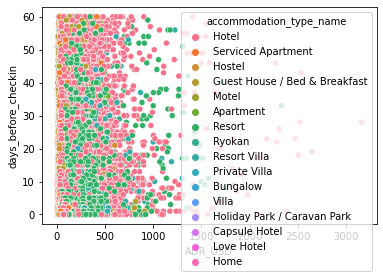

In [1061]:
#plt.figure(dpi=200,figsize=(12,4))
sns.scatterplot(x='ADR_USD',y='days_before_checkin',data=all_cities,hue='accommodation_type_name',
                palette = 'husl')

In [1062]:
#all_cities['accommodation_type_name'].value_counts()

In [257]:
options = ['Bungalow','Ryokan','Motel','Private Villa','Home','Holiday Park / Caravan Park','Love Hotel','Villa']
#dfall[(dfall['accommodation_type_name'] == 'Bungalow' | 'Motel')]

## WHAT IS THE PERCENTAGE OF DATA I AM REMOVING???????????????????????????????????????????

In [258]:
#all_cities[~all_cities['accommodation_type_name'].isin(options)]

<AxesSubplot:xlabel='ADR_USD', ylabel='days_before_checkin'>

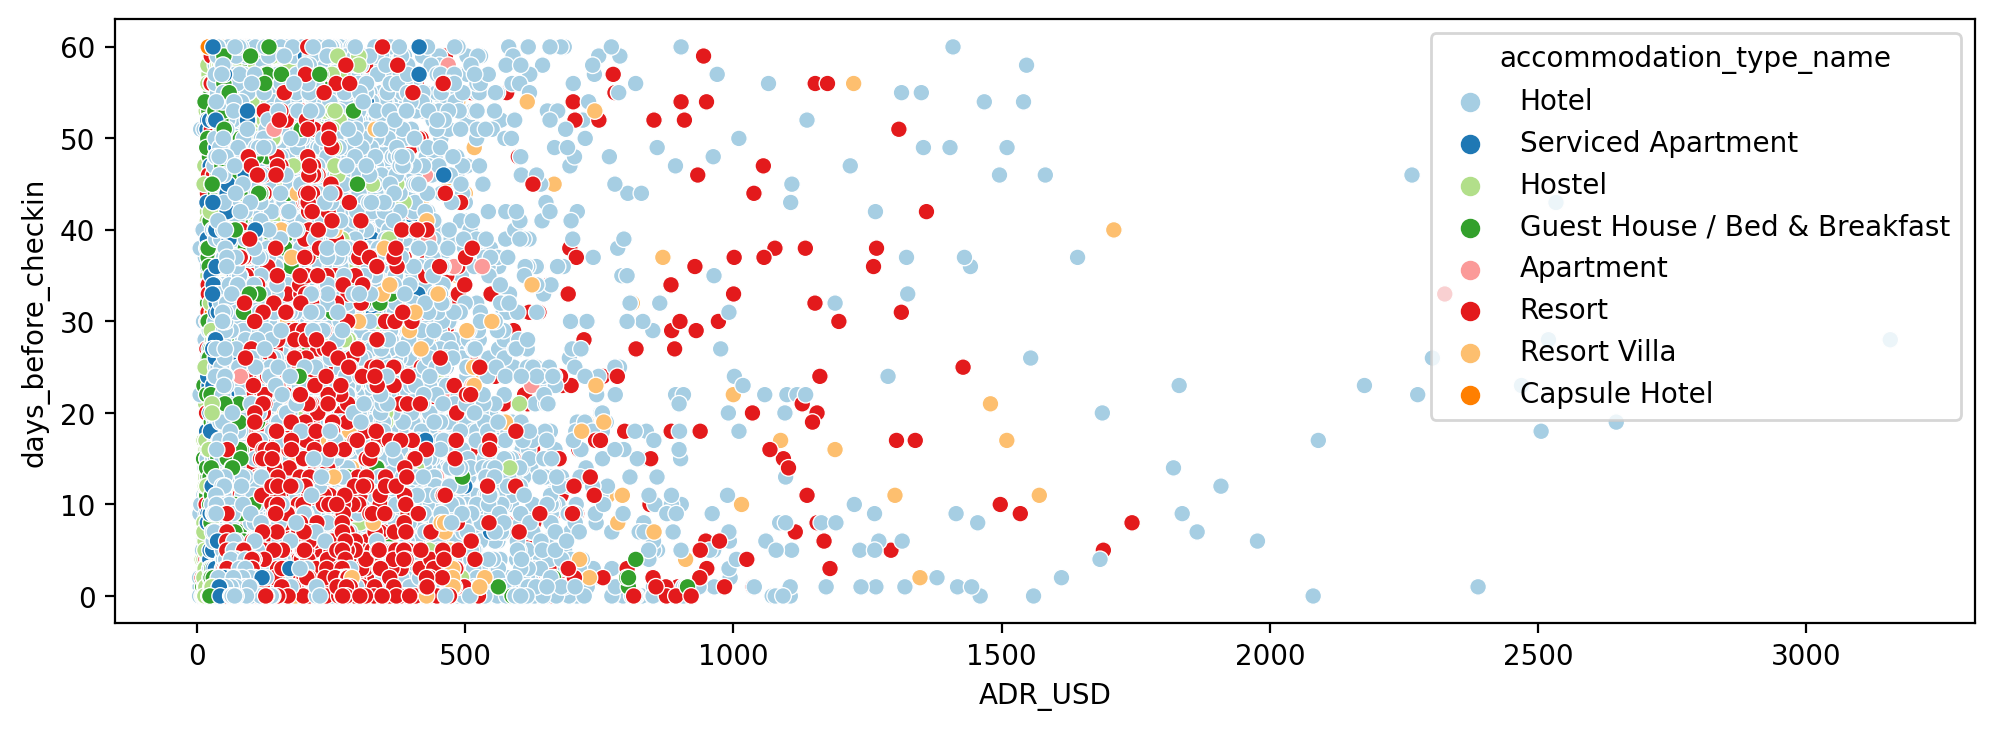

In [259]:
plt.figure(dpi=200,figsize=(12,4))
sns.scatterplot(x='ADR_USD',y='days_before_checkin',data=all_cities[~all_cities['accommodation_type_name'].isin(options)],hue='accommodation_type_name',
                palette = 'Paired')

<AxesSubplot:xlabel='ADR_USD', ylabel='days_before_checkin'>

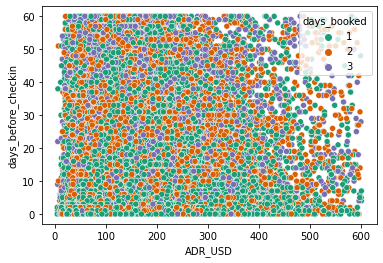

In [1070]:
#plt.figure(dpi=200,figsize=(12,4))
sns.scatterplot(x='ADR_USD',y='days_before_checkin',data=all_cities[all_cities['ADR_USD']<601],hue='days_booked',
                palette = 'Dark2')

### List to crosscheck days_before_checkin looked at against al available criteria
- ADR_USD - relevant
- city_id - not statistically relevant
- hotel_id - ignore
- star_rating - not statistically relevant
- accommodation_type_name - relevant
- chain_hotel - relevant
- booking_date - ignore
- checkin_date - ignore
- checkout_date - ignore
- days_booked - relevant
- total_revenue - relevant


# FINDINGS

# 1 - what percentage of 1 day bookers book last 10 days?

In [1078]:
all_cities[all_cities['days_before_checkin']<11]['days_booked'].value_counts()

1    16040
2     7232
3     3764
Name: days_booked, dtype: int64

## 2 - 40% are yet to book 1 week to check in date

In [1080]:
all_cities_cum['percentage'][:10]

0    100.000000
1     88.579523
2     77.030635
3     70.993253
4     66.040236
5     61.861764
6     58.268278
7     55.037606
8     52.143250
9     49.540368
Name: percentage, dtype: float64

3rd point about revenue?

In [568]:
# ADD calculations revenue

In [260]:
all_cities.head(2)

,#,ADR_USD,hotel_id,city_id,star_rating,accommodation_type_name,chain_hotel,booking_date,checkin_date,checkout_date,days_before_checkin,days_booked,total_revenue
0,1,71.06,297388,9395,2.5,Hotel,non-chain,2016-08-02,2016-10-01,2016-10-02,60,1,71.06
1,2,76.56,298322,9395,3.0,Hotel,non-chain,2016-08-02,2016-10-01,2016-10-02,60,1,76.56


### 4 - Mostly resorts are booked late

In [266]:
(all_cities[all_cities['days_before_checkin']<11])#.groupby('accommodation_type_name').sum()

,#,ADR_USD,hotel_id,city_id,star_rating,accommodation_type_name,chain_hotel,booking_date,checkin_date,checkout_date,days_before_checkin,days_booked,total_revenue
1496,1497,78.460000,297388,9395,2.5,Hotel,non-chain,2016-09-21,2016-10-01,2016-10-02,10,1,78.46
1498,1499,65.820000,601910,9395,3.5,Hotel,non-chain,2016-09-21,2016-10-01,2016-10-02,10,1,65.82
1504,1505,106.040000,21272,9395,4.0,Hotel,non-chain,2016-09-21,2016-10-01,2016-10-04,10,3,318.12
1506,1507,114.240000,21272,9395,4.0,Hotel,non-chain,2016-09-21,2016-10-01,2016-10-02,10,1,114.24
1527,1528,70.220000,601910,9395,3.5,Hotel,non-chain,2016-09-21,2016-10-01,2016-10-02,10,1,70.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49056,4813,72.580000,130890,8584,4.0,Hotel,non-chain,2016-12-31,2016-12-31,2017-01-02,0,2,145.16
49057,4814,70.020000,130890,8584,4.0,Hotel,non-chain,2016-12-31,2016-12-31,2017-01-01,0,1,70.02
49058,4815,921.260000,21720,8584,5.0,Resort,non-chain,2016-12-31,2016-12-31,2017-01-01,0,1,921.26
49059,4816,345.086667,21720,8584,5.0,Resort,non-chain,2016-12-31,2016-12-31,2017-01-03,0,3,1035.26


In [278]:
all_cities['star_rating'].value_counts()

3.0    14798
4.0    14487
3.5     6295
5.0     4080
1.0     3397
2.0     2343
2.5     1929
4.5     1100
1.5      461
0.0      171
Name: star_rating, dtype: int64

In [279]:
(all_cities[all_cities['days_before_checkin']<3])['star_rating'].value_counts()

4.0    4679
3.0    3981
3.5    1571
5.0    1228
1.0     904
2.0     878
2.5     559
4.5     243
1.5     111
0.0      77
Name: star_rating, dtype: int64

In [ ]:
.groupby('accommodation_type_name').sum()

# 

In [1035]:
all_cities.head()

,#,ADR_USD,hotel_id,city_id,star_rating,accommodation_type_name,chain_hotel,booking_date,checkin_date,checkout_date,days_before_checkin,days_booked,total_revenue
0,1,71.06,297388,9395,2.5,Hotel,non-chain,2016-08-02,2016-10-01,2016-10-02,60,1,71.06
1,2,76.56,298322,9395,3.0,Hotel,non-chain,2016-08-02,2016-10-01,2016-10-02,60,1,76.56
2,3,153.88,2313076,9395,5.0,Hotel,chain,2016-08-02,2016-10-01,2016-10-02,60,1,153.88
3,4,126.60,2240838,9395,3.5,Hotel,non-chain,2016-08-04,2016-10-02,2016-10-03,59,1,126.60
4,5,115.08,2240838,9395,3.5,Hotel,non-chain,2016-08-04,2016-10-02,2016-10-03,59,1,115.08


# 

###  Predicting Price

In [27]:
#IMPORT MODELS

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import ElasticNet


from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

#IMPORT PERF METRICS

from sklearn.preprocessing import tests
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report,accuracy_score,plot_confusion_matrix,plot_roc_curve,mean_absolute_error,mean_squared_error

In [589]:
dfall.head(2)

,#,ADR_USD,hotel_id,city_id,star_rating,accommodation_type_name,chain_hotel,booking_date,checkin_date,checkout_date,days_before_checking,days_booked
0,1,71.06,297388,9395,2.5,Hotel,non-chain,2016-08-02,2016-10-01,2016-10-02,60,1
1,2,76.56,298322,9395,3.0,Hotel,non-chain,2016-08-02,2016-10-01,2016-10-02,60,1


In [596]:
dfallmod= dfall.drop(['chain_hotel','accommodation_type_name','booking_date','checkin_date','checkout_date'],axis=1)#.drop()

X = dfallmod.drop('ADR_USD',axis=1)
y = dfallmod['ADR_USD']

In [612]:
X.head()

,#,hotel_id,city_id,star_rating,days_before_checking,days_booked
0,1,297388,9395,2.5,60,1
1,2,298322,9395,3.0,60,1
2,3,2313076,9395,5.0,60,1
3,4,2240838,9395,3.5,59,1
4,5,2240838,9395,3.5,59,1


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [29]:
lmodel = LinearRegression()

In [30]:
lmodel.fit(X_train,y_train)

LinearRegression()

In [31]:
pd.DataFrame(lmodel.coef_)

,0
0,-0.004022
1,0.000006
2,0.001632
3,55.702612
4,0.504328
5,6.626301
6,54.325745
7,-103.044821
8,-17.100909
9,-35.078875


In [32]:
ypreds = lmodel.predict(X_test)

In [33]:
y_test

22665    138.28
7237     144.45
26622     74.78
2785     159.34
18468     79.18
          ...  
47206    205.18
30588     47.15
4089      55.08
371       67.84
39276    420.34
Name: ADR_USD, Length: 14719, dtype: float64

In [34]:
mean_absolute_error(ypreds,y_test)

72.98013218841864

In [35]:
np.sqrt(mean_squared_error(ypreds,y_test))

115.95968708463377

In [36]:
y_test.mean()

146.58239266707432

In [ ]:
lmodel.predict([[0.564,0.522,0.894]])

In [609]:
#ypreds = model.predict(X_test)
#print(classification_report(y_test,ypreds))
#print(f'Accuracy score: {100*(accuracy_score(y_test,ypreds))}')
#plot_confusion_matrix(lmodel,X_test,y_test)

In [1094]:
#Logistic regression
from sklearn import preprocessing
from sklearn import utils

#lab_enc = preprocessing.LabelEncoder()
#encoded = lab_enc.fit_transform(trainingScores)

elasmodel = ElasticNet()
elasmodel.fit(X_train,y_train)



ElasticNet()

In [1095]:
ypreds = elasmodel.predict(X_test)

In [1096]:
mean_absolute_error(ypreds,y_test)

76.05437052740935

In [1097]:
np.sqrt(mean_squared_error(ypreds,y_test))

126.11135060581712

In [ ]:
>>> X, y = make_regression(n_features=4, n_informative=2,
...                        random_state=0, shuffle=False)
>>> regr = RandomForestRegressor(max_depth=2, random_state=0)
>>> regr.fit(X, y)
RandomForestRegressor(...)
>>> print(regr.predict([[0, 0, 0, 0]]))
[-8.32987858]

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [41]:
rf = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 7, random_state = 18)
rf.fit(X_train,y_train)


RandomForestRegressor(max_depth=7, max_features='sqrt', n_estimators=300,
                      random_state=18)

In [42]:
ypreds = rf.predict(X_test)

In [43]:
mean_absolute_error(ypreds,y_test)

53.76255998298028

In [44]:
np.sqrt(mean_squared_error(ypreds,y_test))

88.61296715687337

In [ ]:
{'max_depth': 7,
 'max_features': 'sqrt',
 'n_estimators': 300,
 'random_state': 18}
# Create and train model
rf = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 7, random_state = 18)
rf.fit(x_train, y_train)
# Predict on test data
prediction = rf.predict(x_test)
# Compute mean squared error
mse = mean_squared_error(y_test, prediction)
# Print results
print(mse)
print(mse^.5)

In [ ]:
# PARAMETER SETUP

n_estimators=[64,100,128,200]
max_features= [2,3,4]
bootstrap = [True]
oob_score = [True,False]

param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap,
             'oob_score':oob_score}

rfc = RandomForestClassifier()
grid = GridSearchCV(rfc,param_grid)

In [ ]:
# TRAIN

grid.fit(X_train,y_train)

In [ ]:
# PREDICT

grid.predict(X_test)
ypreds = grid.predict(X_test)
print(classification_report(y_test,ypreds))
print(f'Accuracy score: {100*(accuracy_score(y_test,ypreds))}')
plot_confusion_matrix(grid,X_test,y_test)

# Using all data in datasets

In [101]:
# Random Forest Regressor

all_citiesx = all_cities.drop(['booking_date','checkin_date','checkout_date','total_revenue','#'],axis=1)#.drop()



In [102]:
all_citiesx.head()

,ADR_USD,hotel_id,city_id,star_rating,accommodation_type_name,chain_hotel,days_before_checkin,days_booked
0,71.06,297388,9395,2.5,Hotel,non-chain,60,1
1,76.56,298322,9395,3.0,Hotel,non-chain,60,1
2,153.88,2313076,9395,5.0,Hotel,chain,60,1
3,126.60,2240838,9395,3.5,Hotel,non-chain,59,1
4,115.08,2240838,9395,3.5,Hotel,non-chain,59,1


In [103]:
# using .get_dummies function to convert
# the categorical datatype to numerical
# and storing the returned dataFrame
# in a new variable df1
df1 = pd.get_dummies(all_citiesx['accommodation_type_name'])
 
# using pd.concat to concatenate the dataframes
# df and df1 and storing the concatenated
# dataFrame in df.
all_citiesx = pd.concat([all_citiesx, df1], axis=1).reindex(df.index)
 
# removing the column 'Purchased' from df
# as it is of no use now.
all_citiesx.drop('accommodation_type_name', axis=1, inplace=True)


In [104]:
df1 = pd.get_dummies(all_citiesx['chain_hotel'])
 
# using pd.concat to concatenate the dataframes
# df and df1 and storing the concatenated
# dataFrame in df.
all_citiesx = pd.concat([all_citiesx, df1], axis=1).reindex(df.index)
 
# removing the column 'Purchased' from df
# as it is of no use now.
all_citiesx.drop('chain_hotel', axis=1, inplace=True)

In [105]:
 
# printing df
all_citiesx

,ADR_USD,hotel_id,city_id,star_rating,days_before_checkin,days_booked,Apartment,Bungalow,Capsule Hotel,Guest House / Bed & Breakfast,...,Love Hotel,Motel,Private Villa,Resort,Resort Villa,Ryokan,Serviced Apartment,Villa,chain,non-chain
0,71.060000,297388,9395,2.5,60,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,76.560000,298322,9395,3.0,60,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,153.880000,2313076,9395,5.0,60,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,126.600000,2240838,9395,3.5,59,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,115.080000,2240838,9395,3.5,59,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49059,72.580000,130890,8584,4.0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
49060,70.020000,130890,8584,4.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
49061,921.260000,21720,8584,5.0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
49062,345.086667,21720,8584,5.0,0,3,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [157]:
X = all_citiesx.drop('ADR_USD',axis=1)
y = all_citiesx['ADR_USD']

In [158]:
X.head()

,hotel_id,city_id,star_rating,days_before_checkin,days_booked,Apartment,Bungalow,Capsule Hotel,Guest House / Bed & Breakfast,Holiday Park / Caravan Park,...,Love Hotel,Motel,Private Villa,Resort,Resort Villa,Ryokan,Serviced Apartment,Villa,chain,non-chain
0,297388,9395,2.5,60,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,298322,9395,3.0,60,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2313076,9395,5.0,60,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2240838,9395,3.5,59,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2240838,9395,3.5,59,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [159]:
y.head()

0     71.06
1     76.56
2    153.88
3    126.60
4    115.08
Name: ADR_USD, dtype: float64

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [299]:
rf = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 11, random_state = 18)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=11, max_features='sqrt', n_estimators=300,
                      random_state=18)

In [300]:
ypreds = rf.predict(X_test)

In [301]:
mean_absolute_error(ypreds,y_test)

42.73073821393108

In [302]:
np.sqrt(mean_squared_error(ypreds,y_test))

72.3240469286342

In [303]:
rf.feature_importances_

array([2.98653157e-01, 2.20169423e-01, 2.42058717e-01, 8.32006550e-02,
       1.63594422e-02, 1.38579475e-03, 1.87793566e-04, 3.97888369e-03,
       5.04605868e-03, 1.58888444e-06, 2.22679673e-04, 5.33109791e-03,
       2.34320416e-02, 4.26451512e-05, 3.22568937e-05, 1.00999292e-03,
       2.25938349e-02, 1.04396731e-02, 3.56474677e-03, 4.97466021e-03,
       1.20134352e-06, 2.88321509e-02, 2.84815054e-02])

In [304]:
pd.DataFrame(all_citiesx.columns[1:],rf.feature_importances_*100)

,0
29.865316,hotel_id
22.016942,city_id
24.205872,star_rating
8.320066,days_before_checkin
1.635944,days_booked
0.138579,Apartment
0.018779,Bungalow
0.397888,Capsule Hotel
0.504606,Guest House / Bed & Breakfast
0.000159,Holiday Park / Caravan Park


In [208]:
mean_absolute_error(ypreds,y_test)

37.50023875504659

In [209]:
np.sqrt(mean_squared_error(ypreds,y_test))

70.5299138289468

In [ ]:
'n_estimators': [100, 150, 200, 250, 300]

In [210]:
rf = RandomForestRegressor()

In [211]:
forest_params = [{'max_depth': list(range(10, 15)) , 'n_estimators': [100, 150, 200, 250, 300] }]
 
clf = GridSearchCV(rf, forest_params, cv = 10)

In [212]:
best_clf = clf.fit(X_train,y_train)

In [280]:
best_clf.best_estimator_

RandomForestRegressor(max_depth=11, n_estimators=300)

In [283]:
best_clf.best_estimator_

RandomForestRegressor(max_depth=11, n_estimators=300)

In [ ]:
best_clf.

In [165]:
all_citiesx.columns

Index(['ADR_USD', 'hotel_id', 'city_id', 'star_rating', 'days_before_checkin',
       'days_booked', 'Apartment', 'Bungalow', 'Capsule Hotel',
       'Guest House / Bed & Breakfast', 'Holiday Park / Caravan Park', 'Home',
       'Hostel', 'Hotel', 'Love Hotel', 'Motel', 'Private Villa', 'Resort',
       'Resort Villa', 'Ryokan', 'Serviced Apartment', 'Villa', 'chain',
       'non-chain'],
      dtype='object')

In [168]:
pd.DataFrame(all_citiesx.columns[1:],rf.feature_importances_*100)

,0
25.444417,hotel_id
22.313913,city_id
30.507553,star_rating
3.812360,days_before_checkin
0.966385,days_booked
0.110120,Apartment
0.015979,Bungalow
0.526276,Capsule Hotel
0.606891,Guest House / Bed & Breakfast
0.000110,Holiday Park / Caravan Park


In [ ]:
# neural Network

>>> from sklearn.neural_network import MLPRegressor
>>> from sklearn.datasets import make_regression
>>> from sklearn.model_selection import train_test_split
>>> X, y = make_regression(n_samples=200, random_state=1)
>>> X_train, X_test, y_train, y_test = train_test_split(X, y,
...                                                     random_state=1)
>>> regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
>>> regr.predict(X_test[:2])
array([-0.9..., -7.1...])
>>> regr.score(X_test, y_test)
0.4...

In [1164]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression

In [1165]:
regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)

In [1170]:
ypreds = regr.predict(X_test)

In [1171]:
score = regr.score(X_test, y_test)

In [1172]:
score

0.11699542729976309

In [1173]:
mean_absolute_error(ypreds,y_test)

79.38686260045378

In [1174]:
np.sqrt(mean_squared_error(ypreds,y_test))

123.2596788954116

In [ ]:
# GaussianProcessRegressor

>>> from sklearn.datasets import make_friedman2
>>> from sklearn.gaussian_process import GaussianProcessRegressor
>>> from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
>>> X, y = make_friedman2(n_samples=500, noise=0, random_state=0)
>>> kernel = DotProduct() + WhiteKernel() / RBF
>>> gpr = GaussianProcessRegressor(kernel=kernel,
...         random_state=0).fit(X, y)
#from sklearn.gaussian_process import GaussianProcessRegressor
#gpr = GaussianProcessRegressor(kernel=rbf,random_state=0).fit(X_train, y_train)

# kernels to check - DotProduct() + WhiteKernel() / RBF / The Exponential Sine Squared Kernel

In [91]:
all_citiesx.head()

,hotel_id,city_id,star_rating,days_before_checkin,days_booked,Apartment,Bungalow,Capsule Hotel,Guest House / Bed & Breakfast,Holiday Park / Caravan Park,...,Love Hotel,Motel,Private Villa,Resort,Resort Villa,Ryokan,Serviced Apartment,Villa,chain,non-chain
0,297388,9395,2.5,60,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,298322,9395,3.0,60,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2313076,9395,5.0,60,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2240838,9395,3.5,59,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2240838,9395,3.5,59,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [93]:
# Check for multicollinearity after adding One Hot Encoding

import statsmodels.api as sm

# Function to calculate VIF
def calculate_vif(data):
    vif_df = pd.DataFrame(columns = ['Var', 'Vif'])
    x_var_names = data.columns
    for i in range(0, x_var_names.shape[0]):
        y = data[x_var_names[i]]
        x = data[x_var_names.drop([x_var_names[i]])]
        r_squared = sm.OLS(y,x).fit().rsquared
        vif = round(1/(1-r_squared),2)
        vif_df.loc[i] = [x_var_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis = 0, ascending=True, inplace=False)




In [94]:
#all_citiesx.drop('ADR_USD', axis=1, inplace=True)

In [95]:
calculate_vif(all_citiesx).transpose()

C:\Users\User\AppData\Local\Temp\ipykernel_48876\733323356.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  vif = round(1/(1-r_squared),2)
C:\Users\User\AppData\Local\Temp\ipykernel_48876\733323356.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  vif = round(1/(1-r_squared),2)
C:\Users\User\AppData\Local\Temp\ipykernel_48876\733323356.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  vif = round(1/(1-r_squared),2)
C:\Users\User\AppData\Local\Temp\ipykernel_48876\733323356.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  vif = round(1/(1-r_squared),2)
C:\Users\User\AppData\Local\Temp\ipykernel_48876\733323356.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  vif = round(1/(1-r_squared),2)
C:\Users\User\AppData\Local\Temp\ipykernel_48876\733323356.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  vif = round(1/(1-r_squared),2)
C:\Users\User\AppData\Local\Temp\ipykern

,4,3,1,0,2,20,19,18,17,16,...,11,21,10,9,8,7,6,5,12,22
Var,days_booked,days_before_checkin,city_id,hotel_id,star_rating,Villa,Serviced Apartment,Ryokan,Resort Villa,Resort,...,Hostel,chain,Home,Holiday Park / Caravan Park,Guest House / Bed & Breakfast,Capsule Hotel,Bungalow,Apartment,Hotel,non-chain
Vif,1.04,1.05,1.15,1.18,1.92,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf


In [59]:
from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')

In [107]:
all_citiesx.head()

,ADR_USD,hotel_id,city_id,star_rating,days_before_checkin,days_booked,Apartment,Bungalow,Capsule Hotel,Guest House / Bed & Breakfast,...,Love Hotel,Motel,Private Villa,Resort,Resort Villa,Ryokan,Serviced Apartment,Villa,chain,non-chain
0,71.06,297388,9395,2.5,60,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,76.56,298322,9395,3.0,60,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,153.88,2313076,9395,5.0,60,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,126.60,2240838,9395,3.5,59,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,115.08,2240838,9395,3.5,59,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [108]:
scaler = StandardScaler()

In [118]:
scaled_X_train = scaler.fit_transform(X_train)

In [123]:
scaled_X_test = scaler.transform(X_test)

In [110]:
from sklearn.svm import SVR,LinearSVR

In [175]:
base_model = SVR()

In [176]:
base_model.fit(scaled_X_train,y_train)

SVR()

In [177]:
y_train.head()

20179     66.00
11322    159.88
23777     98.20
16679     54.36
22317     51.06
Name: ADR_USD, dtype: float64

In [178]:
base_preds = base_model.predict(scaled_X_test)

In [179]:
mean_absolute_error(ypreds,y_test)

53.44152771605399

In [181]:
np.sqrt(mean_squared_error(ypreds,y_test))

87.81223559030227

In [127]:
y_test.mean()

146.58239266707432

In [293]:
linearsvr = SVR(kernel='linear', degree=3,C=0.01)

In [294]:
linearsvr.fit(scaled_X_train,y_train)

SVR(C=0.01, kernel='linear')

In [295]:
linearpreds = linearsvr.predict(scaled_X_test)

In [296]:
mean_absolute_error(linearpreds,y_test)

68.71033111533895

In [297]:
np.sqrt(mean_squared_error(linearpreds,y_test))

122.1009512513289

In [287]:
svr.coef_

AttributeError: coef_ is only available when using a linear kernel

In [147]:
base_model2 = SVR(kernel='poly',degree=4,C=0.01)
base_model2.fit(scaled_X_train,y_train)
base_preds2 = base_model2.predict(scaled_X_test)

In [174]:
mean_absolute_error(ypreds,y_test)

53.44152771605399

In [149]:
np.sqrt(mean_squared_error(ypreds,y_test))

88.61296715687337

In [173]:
all_citiesx['ADR_USD'].std()

135.34119497250228

In [128]:
gamma - higher, overfits to data, auto = 0.5
kernal - shape of 'line' that captures data points
degree - of polynomial?
epsilon - 
C - regularization paramet, smaller c, more points outside capture area

param_grid = {'C':[0.001,0.01,0.1,0.5,1],
             'kernel':['linear','rbf','poly'],
              'gamma':['scale','auto'],
              'degree':[2,3,4],
              'epsilon':[0,0.01,0.1,0.5,1,2]}

In [129]:
from sklearn.model_selection import GridSearchCV

In [130]:
svr = SVR()
grid = GridSearchCV(svr,param_grid=param_grid)

In [155]:
#grid.fit(scaled_X_train,y_train)

In [284]:
grid.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [285]:
grid

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [ ]:
grid_preds = grid.predict(scaled_X_test)

In [ ]:
mean_absolute_error(y_test,grid_preds)

In [ ]:
np.sqrt(mean_squared_error(y_test,grid_preds))

In [152]:
all_citiesx.head()

,ADR_USD,hotel_id,city_id,star_rating,days_before_checkin,days_booked,Apartment,Bungalow,Capsule Hotel,Guest House / Bed & Breakfast,...,Love Hotel,Motel,Private Villa,Resort,Resort Villa,Ryokan,Serviced Apartment,Villa,chain,non-chain
0,71.06,297388,9395,2.5,60,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,76.56,298322,9395,3.0,60,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,153.88,2313076,9395,5.0,60,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,126.60,2240838,9395,3.5,59,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,115.08,2240838,9395,3.5,59,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [233]:
all_citiesx['hotel_id'].nunique()

880